In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

## scaling data

In [2]:
df = pd.read_csv('data/temperature.csv')
df

,month,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,jan,13.0,18.2,21.5,21.7,25.3,23.8,24.4,29.1,30.0,30.0
1,Feb,16.4,19.4,21.6,13.7,26.7,23.0,24.8,28.8,29.0,29.0
2,March,22.0,19.0,22.3,20.0,26.0,25.6,27.5,29.0,29.0,29.0
3,April,19.5,17.2,21.1,21.5,25.0,24.5,20.5,28.7,29.2,29.2
4,May,20.0,11.2,21.6,21.4,24.0,24.3,26.2,29.2,29.5,29.5
5,June,20.0,18.5,21.1,22.4,22.0,24.0,26.0,30.2,29.0,29.0
6,July,20.0,16.0,20.8,23.4,23.0,24.5,26.9,30.8,30.1,30.1
7,Aug,18.0,19.1,21.5,21.8,22.2,23.5,27.1,29.0,27.6,27.6
8,Sept,18.2,15.5,19.6,21.5,25.0,26.2,27.5,30.0,29.0,29.0
9,Oct,18.2,20.5,20.2,22.8,26.0,27.3,27.7,27.7,26.2,26.2


In [3]:
print('mean of 2001 = %0.2f'%df['2001'].mean())
print('standard deviation of 2001 = %0.3f ' %df['2001'].std())
print('Maximum value of 2001 = ',df['2001'].max())
print('Minumum value of 2001 = ',df['2001'].min())
print('sum of 2001 = ',df['2001'].sum())


mean of 2001 = 18.64
standard deviation of 2001 = 2.254 
Maximum value of 2001 =  22.0
Minumum value of 2001 =  13.0
sum of 2001 =  223.7


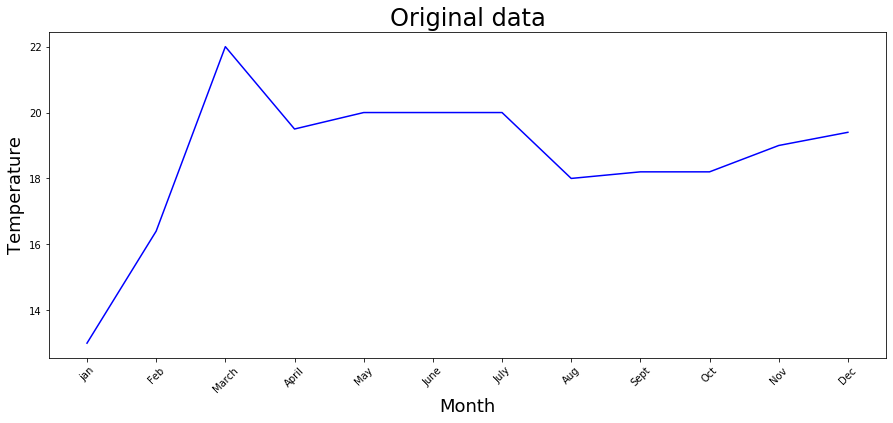

In [4]:
plt.subplots(figsize = [15,6])
plt.plot(df['month'],df['2001'],color ='b')
plt.xlabel('Month',fontsize =18,color='k')
plt.ylabel('Temperature',fontsize =18,color='k')
plt.title('Original data',fontsize =24,color='k')
plt.tick_params(axis='x', rotation= 45)
plt.savefig("image/normal1.png", dpi = 600) # dpi dot per inch
plt.show()

In [5]:
df['2001']

0     13.0
1     16.4
2     22.0
3     19.5
4     20.0
5     20.0
6     20.0
7     18.0
8     18.2
9     18.2
10    19.0
11    19.4
Name: 2001, dtype: float64

In [6]:
A1=df['2001'].values.reshape(-1,1)
A2=df['2002'].values.reshape(-1,1)
A1

array([[13. ],
       [16.4],
       [22. ],
       [19.5],
       [20. ],
       [20. ],
       [20. ],
       [18. ],
       [18.2],
       [18.2],
       [19. ],
       [19.4]])

### Example:1

In [7]:
f_scaled1 = preprocessing.StandardScaler().fit(A1).transform(A1) # (A- mean A)/sd A
f_scaled2 = preprocessing.StandardScaler().fit(A2).transform(A2) # (A- mean A)/sd A
f_scaled1

array([[-2.6137048 ],
       [-1.03853263],
       [ 1.55586859],
       [ 0.39765376],
       [ 0.62929673],
       [ 0.62929673],
       [ 0.62929673],
       [-0.29727514],
       [-0.20461795],
       [-0.20461795],
       [ 0.16601079],
       [ 0.35132517]])

In [8]:
np.sum(f_scaled1)

3.1086244689504383e-15

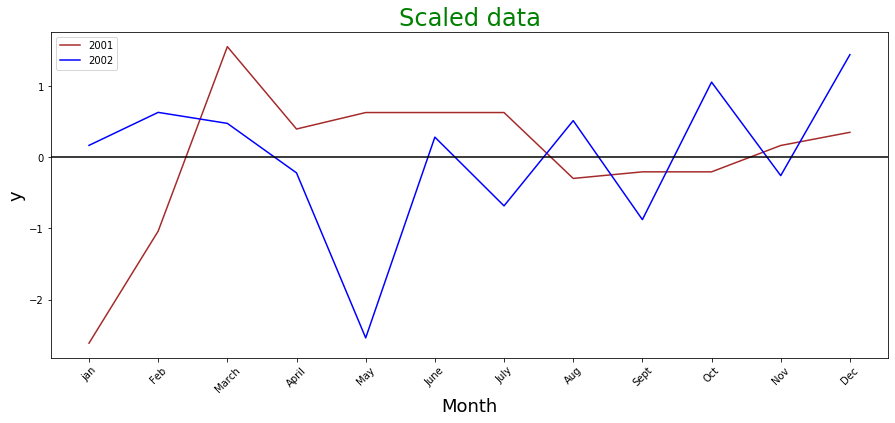

In [9]:
plt.subplots(figsize = [15,6])
plt.plot(df['month'],f_scaled1,color ='brown',label='2001')
plt.plot(df['month'],f_scaled2,color ='blue',label='2002')
plt.axhline(y=0,color='k')
plt.xlabel('Month',fontsize =18,color='k')
plt.ylabel('y',fontsize =18,color='k')
plt.title('Scaled data',fontsize =24,color='g')
plt.tick_params(axis='x', rotation= 45)
plt.legend()
plt.savefig("image/scaled1.png", dpi = 600) # dpi dot per inch
plt.show()

$f(x,\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^{2}}} e ^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}}$

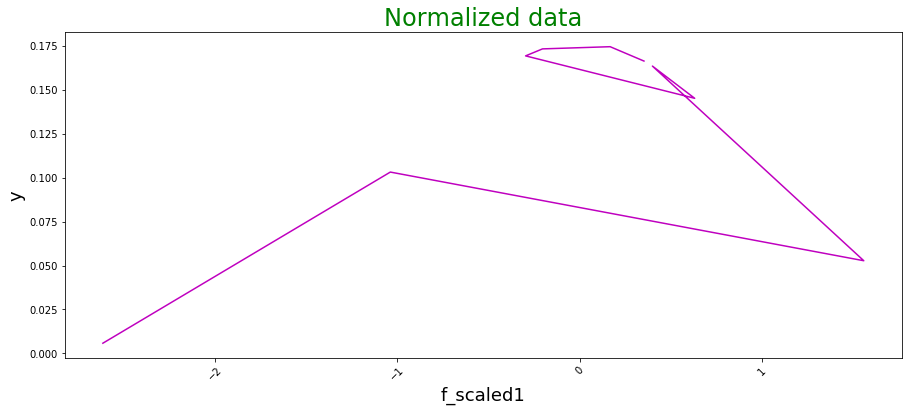

In [10]:
const=np.sqrt(2*np.pi)*df['2001'].std()
normal=np.exp(-0.5*(f_scaled1)**2)/const
plt.subplots(figsize = [15,6])
plt.plot(f_scaled1,normal,color ='m')
plt.xlabel('f_scaled1',fontsize =18,color='k')
plt.ylabel('y',fontsize =18,color='k')
plt.title('Normalized data',fontsize =24,color='g')
plt.tick_params(axis='x', rotation= 45)
plt.savefig("image/normal.png", dpi = 600) # dpi dot per inch

### Example:2

In [11]:
f_scaled3 = preprocessing.MinMaxScaler().fit(A1).transform(A1)# (A- min A)/( max A -min A)
f_scaled3

array([[0.        ],
       [0.37777778],
       [1.        ],
       [0.72222222],
       [0.77777778],
       [0.77777778],
       [0.77777778],
       [0.55555556],
       [0.57777778],
       [0.57777778],
       [0.66666667],
       [0.71111111]])

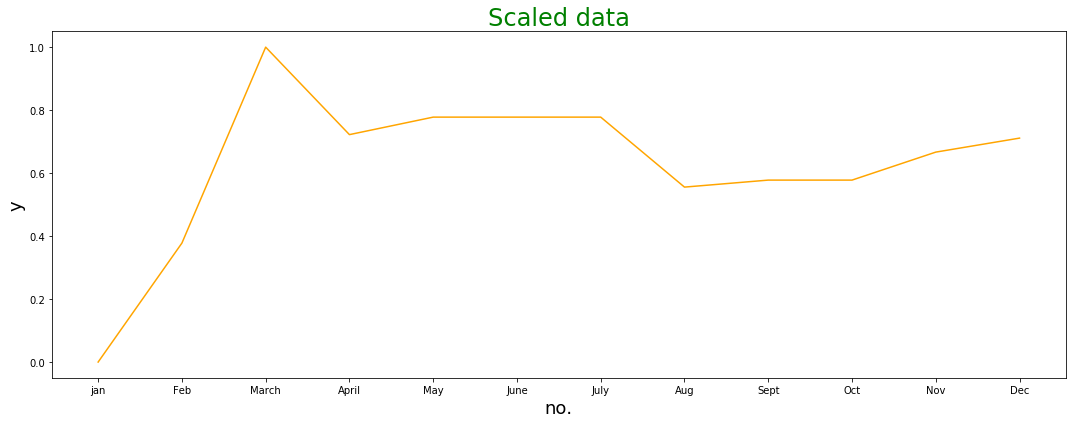

In [12]:
plt.subplots(figsize = [15,6])
plt.plot(df['month'],f_scaled3,color ='orange')
plt.xlabel('no.',fontsize =18,color='k')
plt.ylabel('y',fontsize =18,color='k')
plt.title('Scaled data',fontsize =24,color='g')
plt.tight_layout() 
plt.savefig("image/scaled2.png", dpi = 600) # dpi dot per inch
plt.show()

### Example:3

In [13]:
A = (100*np.random.rand(10,10)).astype(int) # construction of 10 x 10 matrix
A 

array([[19, 52, 88, 24, 65, 93, 23, 64, 92, 24],
       [73, 38, 32, 71, 14, 82, 81, 36, 22, 30],
       [51,  6, 17, 95, 63, 37, 81, 33, 72, 37],
       [77, 94, 14, 64, 64, 56, 29, 40, 33, 42],
       [58, 49, 80, 22, 51, 95,  5, 75, 26,  1],
       [79, 65, 85, 42, 46, 74, 42, 38, 15, 81],
       [63,  7, 84, 31, 79, 28, 92, 63, 96,  4],
       [54, 77, 19, 32, 52, 71, 68, 87, 51,  7],
       [49, 86, 23, 71, 96,  0,  3, 45, 80, 45],
       [69, 67, 10, 21, 40,  4, 92, 73, 31, 12]])

In [14]:
n=np.arange(1,11)

In [15]:
df = pd.DataFrame(A, columns= ['Nepali','English','Math','Science','Health','History','Geography','Social','Moral','Computer'],\
                  index= [n])

In [16]:
df

,Nepali,English,Math,Science,Health,History,Geography,Social,Moral,Computer
1,19,52,88,24,65,93,23,64,92,24
2,73,38,32,71,14,82,81,36,22,30
3,51,6,17,95,63,37,81,33,72,37
4,77,94,14,64,64,56,29,40,33,42
5,58,49,80,22,51,95,5,75,26,1
6,79,65,85,42,46,74,42,38,15,81
7,63,7,84,31,79,28,92,63,96,4
8,54,77,19,32,52,71,68,87,51,7
9,49,86,23,71,96,0,3,45,80,45
10,69,67,10,21,40,4,92,73,31,12


In [17]:
df.index.names = ['Roll no'] #naming index
df

,Nepali,English,Math,Science,Health,History,Geography,Social,Moral,Computer
Roll no,,,,,,,,,,
1,19,52,88,24,65,93,23,64,92,24
2,73,38,32,71,14,82,81,36,22,30
3,51,6,17,95,63,37,81,33,72,37
4,77,94,14,64,64,56,29,40,33,42
5,58,49,80,22,51,95,5,75,26,1
6,79,65,85,42,46,74,42,38,15,81
7,63,7,84,31,79,28,92,63,96,4
8,54,77,19,32,52,71,68,87,51,7
9,49,86,23,71,96,0,3,45,80,45


In [18]:
df.iloc[5,1]

65

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, (1,) to (10,)
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Nepali     10 non-null     int32
 1   English    10 non-null     int32
 2   Math       10 non-null     int32
 3   Science    10 non-null     int32
 4   Health     10 non-null     int32
 5   History    10 non-null     int32
 6   Geography  10 non-null     int32
 7   Social     10 non-null     int32
 8   Moral      10 non-null     int32
 9   Computer   10 non-null     int32
dtypes: int32(10)
memory usage: 866.0 bytes


In [20]:
df.describe()

,Nepali,English,Math,Science,Health,History,Geography,Social,Moral,Computer
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,59.200000,54.100000,45.200000,47.300000,57.000000,54.000000,51.600000,55.400000,51.800000,28.30000
std,17.718791,30.259801,34.146091,25.991665,22.295989,35.055512,35.302502,19.294213,30.673188,24.48605
min,19.000000,6.000000,10.000000,21.000000,14.000000,0.000000,3.000000,33.000000,15.000000,1.00000
25%,51.750000,40.750000,17.500000,25.750000,47.250000,30.250000,24.500000,38.500000,27.250000,8.25000
50%,60.500000,58.500000,27.500000,37.000000,57.500000,63.500000,55.000000,54.000000,42.000000,27.00000
75%,72.000000,74.500000,83.000000,69.250000,64.750000,80.000000,81.000000,70.750000,78.000000,40.75000
max,79.000000,94.000000,88.000000,95.000000,96.000000,95.000000,92.000000,87.000000,96.000000,81.00000


In [21]:
np.mean(df,axis =0)

Nepali       59.2
English      54.1
Math         45.2
Science      47.3
Health       57.0
History      54.0
Geography    51.6
Social       55.4
Moral        51.8
Computer     28.3
dtype: float64

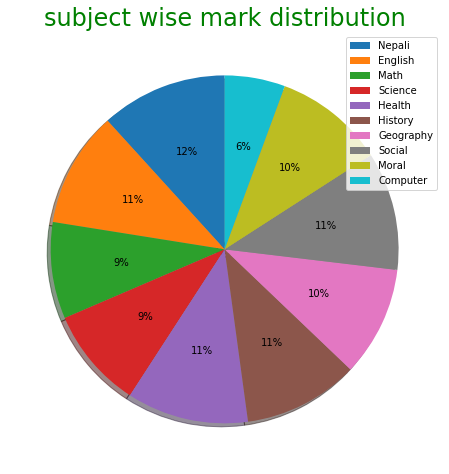

In [22]:
plt.figure(figsize = [10,8])
plt.pie(np.mean(df,axis =0),startangle=90, autopct='%1.0f%%', shadow = True) 
plt.legend(df.columns, loc = 'upper right') 
plt.title("subject wise mark distribution",fontsize =24,color='g')
plt.show()

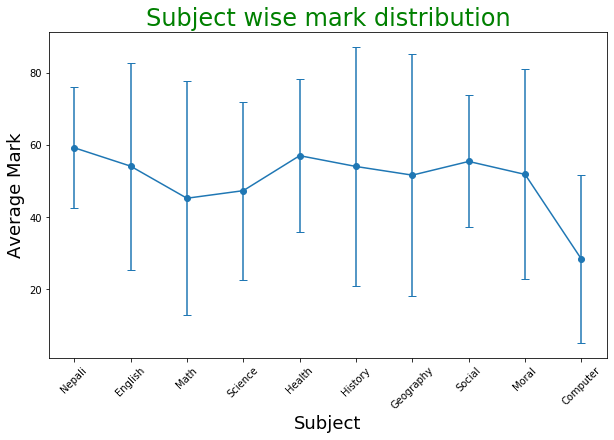

In [23]:
plt.figure(figsize = [10,6])
plt.errorbar(df.columns, np.mean(df,axis =0),yerr=np.std(df,axis =0),fmt='-o',capsize=4) #SE
plt.xlabel('Subject',fontsize =18,color='k')
plt.ylabel('Average Mark',fontsize =18,color='k')
plt.title("Subject wise mark distribution",fontsize =24,color='g')
plt.tick_params(axis='x', rotation= 45)
plt.show()

In [24]:
np.mean(df,axis =1)

Roll no
1          54.4
2          47.9
3          49.2
4          51.3
5          46.2
6          56.7
7          54.7
8          51.8
9          49.8
10         41.9
dtype: float64

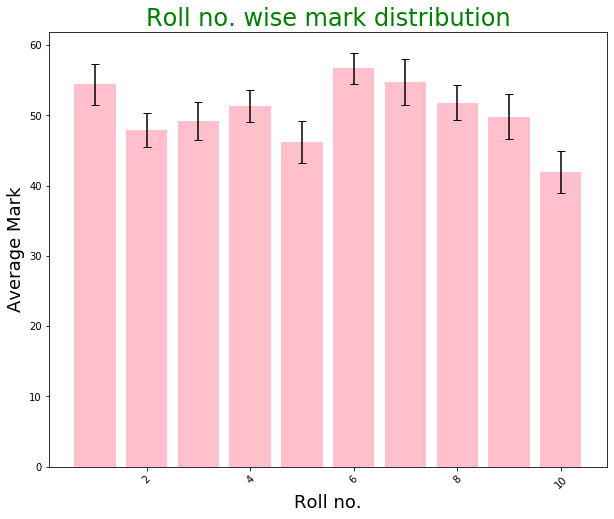

In [25]:
plt.figure(figsize = [10,8])
plt.bar(n,np.mean(df,axis =1),yerr=0.1*np.std(df,axis =1),align='center', color="pink",capsize=4)
plt.xlabel('Roll no.',fontsize =18,color='k')
plt.ylabel('Average Mark',fontsize =18,color='k')
plt.tick_params(axis='x', rotation= 45)
plt.title("Roll no. wise mark distribution",fontsize =24,color='g')
plt.show()

In [26]:
df['Percentage']=100*np.sum(df,axis =1)/1000 #
df   

,Nepali,English,Math,Science,Health,History,Geography,Social,Moral,Computer,Percentage
Roll no,,,,,,,,,,,
1,19,52,88,24,65,93,23,64,92,24,54.4
2,73,38,32,71,14,82,81,36,22,30,47.9
3,51,6,17,95,63,37,81,33,72,37,49.2
4,77,94,14,64,64,56,29,40,33,42,51.3
5,58,49,80,22,51,95,5,75,26,1,46.2
6,79,65,85,42,46,74,42,38,15,81,56.7
7,63,7,84,31,79,28,92,63,96,4,54.7
8,54,77,19,32,52,71,68,87,51,7,51.8
9,49,86,23,71,96,0,3,45,80,45,49.8


In [27]:
df.iloc[1,10]

47.9

In [28]:
grade=[]
for i in range(10):
    if(df.iloc[i,0]>30 and df.iloc[i,1]>30 and df.iloc[i,2]>30 and df.iloc[i,3]>30 and df.iloc[i,4]>30 and df.iloc[i,5]>30 and df.iloc[i,6]>30 and df.iloc[i,7]>30 and df.iloc[i,8]>30 and df.iloc[i,9]>30):
        if(df.iloc[i,10]>=40 and  df.iloc[i,10]<50):
            y='E'
        elif(df.iloc[i,10]>=50 and  df.iloc[i,10]<60):
            y='D'
        elif(df.iloc[i,10]>=60 and  df.iloc[i,10]<70):
            y='C'
        elif(df.iloc[i,10]>=70 and  df.iloc[i,10]<80):
            y='B' 
        elif(df.iloc[i,10]>=80 and  df.iloc[i,10]<90):
            y='A' 
        elif(df.iloc[i,10]>=90 and  df.iloc[i,10]<=100):
            y='A+'
        else:
            y='F'
    else:
        y='F'
    grade.append(y)     

In [29]:
df['Grade']=grade
df

,Nepali,English,Math,Science,Health,History,Geography,Social,Moral,Computer,Percentage,Grade
Roll no,,,,,,,,,,,,
1,19,52,88,24,65,93,23,64,92,24,54.4,F
2,73,38,32,71,14,82,81,36,22,30,47.9,F
3,51,6,17,95,63,37,81,33,72,37,49.2,F
4,77,94,14,64,64,56,29,40,33,42,51.3,F
5,58,49,80,22,51,95,5,75,26,1,46.2,F
6,79,65,85,42,46,74,42,38,15,81,56.7,F
7,63,7,84,31,79,28,92,63,96,4,54.7,F
8,54,77,19,32,52,71,68,87,51,7,51.8,F
9,49,86,23,71,96,0,3,45,80,45,49.8,F


In [30]:
df.to_csv("data/result.csv")  #save data in csv format in excel

correlation coefficient
$(r)=\frac{cov(x,y)}{\sqrt{\sigma_x \sigma_y}}$

In [36]:
cov=np.cov(df.iloc[:,1],df.iloc[:,2])
cov[0][1]

-344.3555555555555

In [35]:
cv=np.corrcoef(df.iloc[:,1],df.iloc[:,3])
cv

array([[ 1.        , -0.14908476],
       [-0.14908476,  1.        ]])

In [37]:
cv[0,1]

-0.1490847615170243

In [33]:
r=np.eye(10,10) # construction of 10 x 10 identical matrix
for i in range(10):
    for j in range(10):
        a=np.corrcoef(df.iloc[:,i],df.iloc[:,j])
        r[i][j]="{:.3}".format(a[0,1])       
    

In [34]:
df1 = pd.DataFrame(r)
df1

,0,1,2,3,4,5,6,7,8,9
0,1.000,0.1430,-0.2420,0.1480,-0.4230,-0.1410,0.3090,-0.3020,-0.7250,0.2900
1,0.143,1.0000,-0.3330,-0.1490,0.0743,-0.0398,-0.5360,0.1390,-0.3670,0.2700
2,-0.242,-0.3330,1.0000,-0.5130,0.0865,0.5050,-0.2710,0.1360,0.1710,0.0115
3,0.148,-0.1490,-0.5130,1.0000,0.0953,-0.2400,0.0598,-0.8210,0.0504,0.4790
4,-0.423,0.0743,0.0865,0.0953,1.0000,-0.4780,-0.4040,0.0101,0.7440,0.0254
5,-0.141,-0.0398,0.5050,-0.2400,-0.4780,1.0000,-0.2790,0.1020,-0.3190,-0.0159
6,0.309,-0.5360,-0.2710,0.0598,-0.4040,-0.2790,1.0000,0.0275,0.0113,-0.2460
7,-0.302,0.1390,0.1360,-0.8210,0.0101,0.1020,0.0275,1.0000,0.1030,-0.7630
8,-0.725,-0.3670,0.1710,0.0504,0.7440,-0.3190,0.0113,0.1030,1.0000,-0.2640
9,0.290,0.2700,0.0115,0.4790,0.0254,-0.0159,-0.2460,-0.7630,-0.2640,1.0000
